# Basic usage of the cnnclustering module

In [1]:
import sys

# Optional dependencies
import matplotlib as mpl
import matplotlib.pyplot as plt

from cnnclustering import cluster

The notebook was created using Python 3.8.

In [2]:
# Version information
print(sys.version)

3.8.8 (default, Mar 11 2021, 08:58:19) 
[GCC 8.3.0]


## Notebook configuration

We use `matplotlib` to create plots. The `"matplotlibrc"` file in the root directory of the CommonNNClustering repository is used to customize the appearance of the plots.

In [3]:
# Matplotlib configuration
mpl.rc_file(
    "../../matplotlibrc",
    use_default_template=False
)

In [4]:
# Axis property defaults for the plots
ax_props = {
    "aspect": "equal"
}

# Property defaults for plotted lines
dot_props = {
    "marker": "o",
    "markeredgecolor": "k"
}

## Getting started

The `cnnclustering.cluster` main module provides the `Clustering` class. An instance of this class is used to bundle input data (e.g. data points) with cluster results (cluster label assignments) alongside the clustering methods and convenience functions for further analysis (not only in an Molecular Dynamics context). As a guiding principle, a `Clustering` cluster object is always associated with one particular data set and allows varying cluster parameters.

<div class="alert alert-info">

**Info:** The user is also refered to the [__scikit-learn-extra__ project](https://github.com/scikit-learn-contrib/scikit-learn-extra) for an alternative API following a parameter centered approach to clustering as `sklearn_extra.cluster.CommonNNClustering`.

</div>

Commonly, a clustering object is recommended to be created via `cnnclustering.cluster.prepare_clustering` which takes care of the correct composition of the object. By default, data points that should be clustered are passed to the preparation function as a nested sequence, e.g. a list of lists. This will be understood as the coordinates of a number of data points. Similar data structures, lik a two-dimensional `NumPy` array would be acceptable, as well. It is possible to use different kinds of input data formats instead, like for example pre-computed parwise distances, and it is described later how to do it (<font color="red">refer to section</font>). 

In [5]:
# 2D Data points (list of lists, 12 points in 2 dimensions)
data_points = [   # Point index
    [0, 0],       # 0
    [1, 1],       # 1
    [1, 0],       # 2
    [0, -1],      # 3
    [0.5, -0.5],  # 4
    [2,  1.5],    # 5
    [2.5, -0.5],  # 6
    [4, 2],       # 7
    [4.5, 2.5],   # 8
    [5, -1],      # 9
    [5.5, -0.5],  # 10
    [5.5, -1.5],  # 11
    ]

clustering = cluster.prepare_clustering(data_points)
print(clustering)

Clustering()


The data points that we passed to create the clustering object are stored on the instance and can be accessed via the `input_data` attribute.

In [6]:
clustering.input_data

array([[ 0. ,  0. ],
       [ 1. ,  1. ],
       [ 1. ,  0. ],
       [ 0. , -1. ],
       [ 0.5, -0.5],
       [ 2. ,  1.5],
       [ 2.5, -0.5],
       [ 4. ,  2. ],
       [ 4.5,  2.5],
       [ 5. , -1. ],
       [ 5.5, -0.5],
       [ 5.5, -1.5]])

When we cluster, we are essentially interested in cluster label assignments for these points. These labels will be exposed as `labels` attribute on the instance, which is currently `None` because no clustering has been done yet.

In [7]:
clustering.labels is None

True

To cluster these points we will use the `fit` method. The clustering depends on two parameters:
  
  - `radius_cutoff`: Points are considered neighbours if the distance between them is smaller than this cutoff radius $r$.
  - `cnn_cutoff`: Points are assigned to the same cluster if they share at least this number of $c$ common neighbours.
  
For the clustering procedure, we ultimately need to compute the neighbouring points with respect to the `radius_cutoff` for each point in the data set. Then we can determine if two points fulfill the criterion of being part of the same cluster. How this is done, can be controlled in detail but by default the input data points are assumed to be given in euclidean space and the neighbours are computed brute force. For larger data sets it makes sense to use a different approach (<font color="red">refer to section</font>).

In [8]:
clustering.fit(radius_cutoff=1.5, cnn_cutoff=1)

-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
12        1.500     1         None      None      2         0.417     0.333     00:00:0.000
-----------------------------------------------------------------------------------------------



A clustering attempt returns and prints a comprehensive summary of the cluster parameters and the outcome. You can suppress the recording with the keyword argument `rec=False` and the printing with `v=False`:

  - #points: Number of data points.
  - r: Radius cutoff *r*.
  - c: Common-nearest-neighour cutoff *c*.
  - min: Member cutoff (valid clusters need to have at least this many members).
  - max: Maximum cluster count (keep only the *max* largest clusters and disregard smaller clusters).
  - #clusters: Number of identified clusters.
  - %largest: Member share on the total number of points in the largest cluster.
  - %noise: Member share on the total number of points identified as noise (not part of any cluster).
  
The `min` (keyword argument `member_cutoff`) and `max` (keyword argument `max_clusters`) only take effect in an optional post processing step when `sort_by_size=True` (default). Then the clusters are sorted in order by there size, so that the first cluster (cluster 1) has the highest member count. Optionally, they are trimmed in the way that valid clusters have a minimum number of members (`member_cutoff`) and only the largest clusters are kept (`max_clusters`).

The outcome of the clustering are cluster label assignments for each point. Points classified as *noise* (not part of any cluster) are labeled 0. Integer labels larger than 0 indicate the membership to one of the identified cluster of each point. If clusters where sorted (`sort_by_size = True`), cluster 1 has the highest member count.

In [9]:
clustering.labels

Labels([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2])

The `labels` attribute of a cluster object always holds the result of the latest fit. All cluster results (from fits where `rec=True`) are collected in a summary without storing the actual labels.

In [10]:
clustering.fit(radius_cutoff=2, cnn_cutoff=1, v=False)
print(*clustering.summary, sep="\n")

-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
12        1.500     1         None      None      2         0.417     0.333     00:00:0.000
-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------
#points   r         c         min       max       #clusters %largest  %noise    time     
12        2.000     1         None      None      2         0.583     0.167     00:00:0.000
-----------------------------------------------------------------------------------------------



If you have Pandas installed, the summary can be transformed into a handy `pandas.DataFrame`.

In [11]:
clustering.summary.to_DataFrame()

,n_points,radius_cutoff,cnn_cutoff,member_cutoff,max_clusters,n_clusters,ratio_largest,ratio_noise,execution_time
0,12,1.5,1,<NA>,<NA>,2,0.416667,0.333333,0.000140
1,12,2.0,1,<NA>,<NA>,2,0.583333,0.166667,0.000087


A cluster object comes with a variety of convenience methods that allow for example a quick look at a plot of data points and a cluster result.

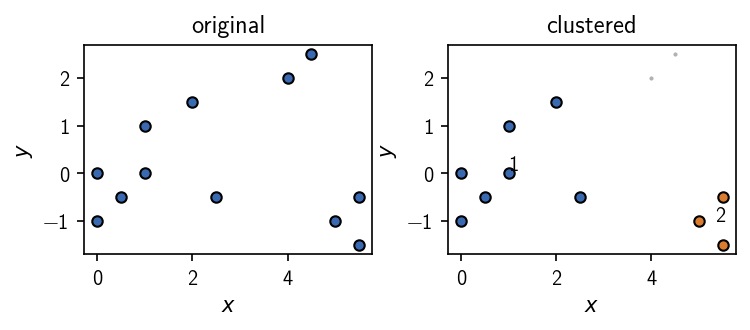

In [12]:
fig, ax = plt.subplots(1, 2)

ax[0].set_title("original")
clustering.evaluate(
    ax=ax[0], original=True,
    ax_props=ax_props, plot_props=dot_props
    )

ax[1].set_title("clustered")
clustering.evaluate(
    ax=ax[1],
    ax_props=ax_props, plot_props=dot_props
    )
fig.tight_layout()